<h2>Тема: Обробка зображень та робота з наборами файлів цифрових зображень</h2>
<h2>Мета: Отримати знання та навики в обробці цифрових зображень за допомогою бібліотек Pillow та/або OpenCV та роботі з обробки набору зображень.</h2>

,name,color mode,format,channels,size,width,height,full path,image
0,1.jpg,RGB,JPEG,3,0.02,278,181,Data\1.jpg,
1,10.jpg,RGB,JPEG,3,0.01,275,183,Data\10.jpg,
2,11.jpg,RGB,JPEG,3,0.02,270,187,Data\11.jpg,
3,12.jpg,RGB,JPEG,3,0.02,308,164,Data\12.jpg,
4,13.jpg,RGB,JPEG,3,0.02,308,164,Data\13.jpg,
5,14.jpg,RGB,JPEG,3,0.02,259,194,Data\14.jpg,
6,15.jpg,RGB,JPEG,3,0.01,276,183,Data\15.jpg,
7,2.jpg,RGB,JPEG,3,0.01,225,225,Data\2.jpg,
8,3.jpg,RGB,JPEG,3,0.01,276,183,Data\3.jpg,
9,4.jpg,RGB,JPEG,3,0.02,277,182,Data\4.jpg,

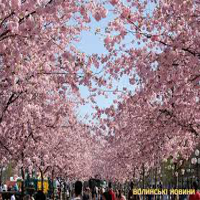
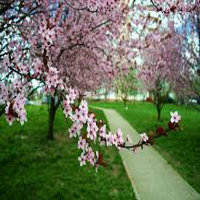
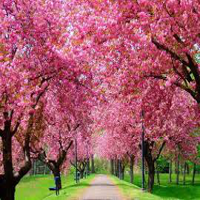
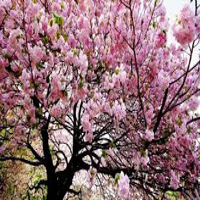
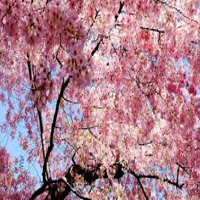
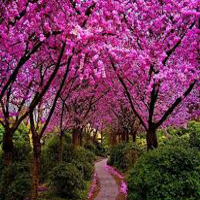
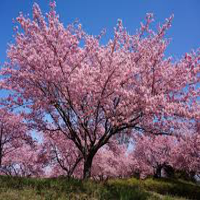
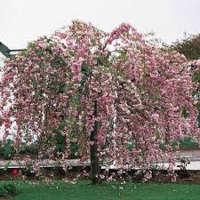
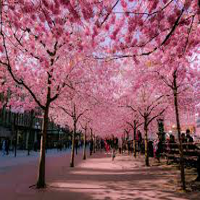
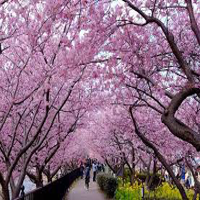
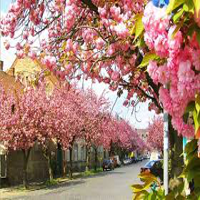
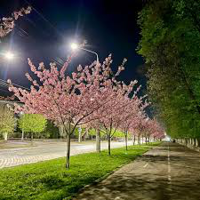
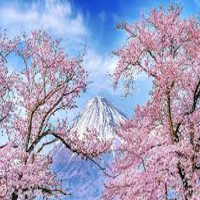
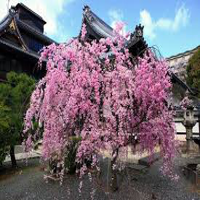
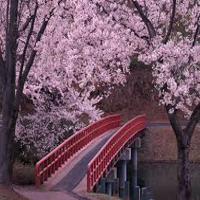

In [5]:
import pandas as pd
import glob
import os  
from PIL import Image
from io import BytesIO
from IPython.display import HTML, display  
import base64
import random


def getInfoAboutImgFromDir(dirPath):
    file_paths = glob.glob(f'{dirPath}/*.jpg') + glob.glob(f'{dirPath}/*.png')
    
    if not file_paths:
        print("No image files found in the directory.")
        return pd.DataFrame()
    
    image_data = []
    
    for file in file_paths:
        try:
            with Image.open(file) as img:
                
                name = os.path.basename(file)
                color_mode = img.mode
                img_format = img.format
                channels = len(img.getbands())
                original_size = os.path.getsize(file)
                width, height = img.size
                
                img_resized = img.resize((200, 200))
                
                buffered = BytesIO()
                img_resized.save(buffered, format="PNG")
                img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
                
                image_data.append({
                    'name': name,
                    'color mode': color_mode,
                    'format': img_format,
                    'channels': channels,
                    'size': round(original_size / (1024 * 1024), 2),
                    'width': width,
                    'height': height,
                    'full path': file,
                    'image': f'<img src="data:image/png;base64,{img_str}" width="100" height="100">'
                })
                
        except Exception as e:
            print(f"Error processing {file}: {e}")
    
    df = pd.DataFrame(image_data, columns=[
        'name', 'color mode', 'format', 'channels', 'size', 'width', 'height', 'full path', 'image'
    ])
    
    return HTML(df.to_html(escape=False))

dir_path = r'Data'
display(getInfoAboutImgFromDir(dir_path))

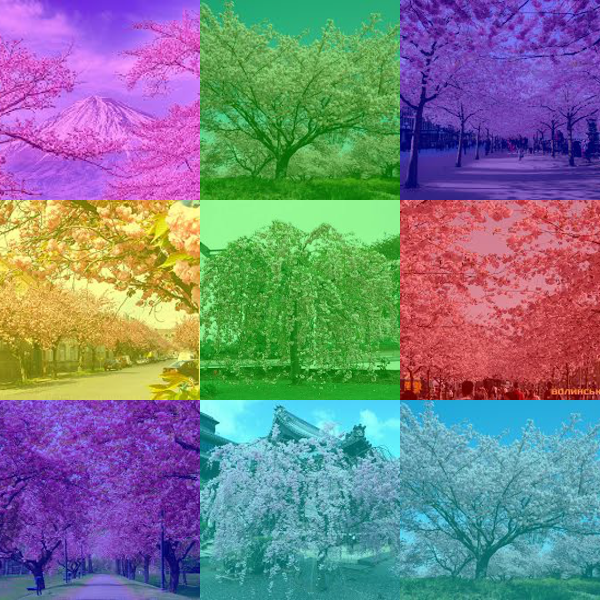

In [7]:
def transform_to_square(img):
    
    width, height = img.size
    min_side = min(width, height)
    left = (width - min_side) // 2
    top = (height - min_side) // 2
    right = left + min_side
    bottom = top + min_side
    return img.crop((left, top, right, bottom))

def create_poster(dir_path, cols, rows, output_size=200):
    
    file_paths = glob.glob(f"{dir_path}/*.jpg") + glob.glob(f"{dir_path}/*.png")
    
    if not file_paths:
        print("No image files found in the directory.")
        return

    color_filters = [
        (255, 0, 0, 100),  # Червоний
        (0, 255, 0, 100),  # Зелений
        (0, 0, 255, 100),  # Синій
        (255, 255, 0, 100),  # Жовтий
        (255, 0, 255, 100),  # Пурпуровий
        (0, 255, 255, 100)  # Блакитний
    ]
    
    poster_width = cols * output_size
    poster_height = rows * output_size
    poster = Image.new("RGB", (poster_width, poster_height))
    
    for row in range(rows):
        for col in range(cols):
            img_path = random.choice(file_paths)
            with Image.open(img_path) as img:
                img = transform_to_square(img)
                img = img.resize((output_size, output_size))
                
                filter_color = random.choice(color_filters)
                overlay = Image.new("RGBA", img.size, filter_color)
                img = Image.alpha_composite(img.convert("RGBA"), overlay).convert("RGB")
                
                poster.paste(img, (col * output_size, row * output_size))
    
    display(poster)

dir_path = "Data" 
cols, rows = 3,3 
create_poster(dir_path, cols, rows)